In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = "./data"

In [11]:
def process_data(data_path):
    dict_data_plot={}
    for game in os.listdir(data):
        if game not in dict_data_plot.keys():
            dict_data_plot[game]={}
        folder_game = os.path.join(data,game)
        for optimizer in os.listdir(folder_game):
            folder_optimizer = os.path.join(folder_game,optimizer)
            dataframe = pd.DataFrame([i for i in range(50000,1000001,50000)], columns=["Steps"])
            dcols=[]
            print()
            for seed in os.listdir(folder_optimizer):
                if "uc" in seed:
                    continue
                temp = seed.split("_")
                seed_name = "_".join([temp[-2],temp[-1]])
                dcols.append(seed_name)
                dpath = os.path.join(folder_optimizer,seed,"scores.txt")
                #print(dpath)
                print(f"{seed_name}:{seed} - {dpath}")
                score = pd.read_table(dpath, sep="\t")
                dataframe[seed_name] = score["mean"]
            dataframe["mean"] = dataframe[dcols].values.mean(axis=1)
            dataframe["std"] = dataframe[dcols].values.std(axis=1)
            dict_data_plot[game][optimizer] = dataframe[["Steps","mean","std"]].copy()
    return dict_data_plot

In [4]:
#dict_data_plot

In [5]:
#dict_data_plot['HalfCheetahv2']['AdaBelief'].values

In [6]:
def plot(dict_data_plot):
    fig, ax = plt.subplots(1,2, figsize=(14,9))
    keys = list(dict_data_plot.keys())
    for i in range(2):
        k = keys[i]
        for opt in dict_data_plot[k].keys():
            mean = dict_data_plot[k][opt]["mean"].values
            std = dict_data_plot[k][opt]["std"].values
            ax[i].fill_between(dict_data_plot[k][opt]["Steps"].values,mean-std,mean+std,alpha=0.30)
            ax[i].plot(dict_data_plot[k][opt]["Steps"],mean, label=opt)
            ax[i].legend()
        name_sub = "Result of "+k[:len(k)-2]+"-"+k[-2]+k[-1]
        ax[i].set_title(name_sub)
        #ax[i].set_xscale('log', base=10)
        #ax[i].set_yscale('log', base=10)
    fig.savefig("AdaBelief_RL.png")
    return fig

In [12]:
d = process_data(data)


Seed_0:AdaBelief_HalfCheetahv2_Seed_0 - ./data\HalfCheetahv2\AdaBelief\AdaBelief_HalfCheetahv2_Seed_0\scores.txt
Seed_1:AdaBelief_HalfCheetahv2_Seed_1 - ./data\HalfCheetahv2\AdaBelief\AdaBelief_HalfCheetahv2_Seed_1\scores.txt
Seed_2:AdaBelief_HalfCheetahv2_Seed_2 - ./data\HalfCheetahv2\AdaBelief\AdaBelief_HalfCheetahv2_Seed_2\scores.txt
Seed_3:AdaBelief_HalfCheetahv2_Seed_3 - ./data\HalfCheetahv2\AdaBelief\AdaBelief_HalfCheetahv2_Seed_3\scores.txt
Seed_4:AdaBelief_HalfCheetahv2_Seed_4 - ./data\HalfCheetahv2\AdaBelief\AdaBelief_HalfCheetahv2_Seed_4\scores.txt
Seed_5:AdaBelief_HalfCheetahv2_Seed_5 - ./data\HalfCheetahv2\AdaBelief\AdaBelief_HalfCheetahv2_Seed_5\scores.txt
Seed_6:AdaBelief_HalfCheetahv2_Seed_6 - ./data\HalfCheetahv2\AdaBelief\AdaBelief_HalfCheetahv2_Seed_6\scores.txt
Seed_7:AdaBelief_HalfCheetahv2_Seed_7 - ./data\HalfCheetahv2\AdaBelief\AdaBelief_HalfCheetahv2_Seed_7\scores.txt
Seed_8:AdaBelief_HalfCheetahv2_Seed_8 - ./data\HalfCheetahv2\AdaBelief\AdaBelief_HalfCheetahv2_

In [10]:
d["Walker2dv2"]

{'Adabelief':       Steps         mean          std
 0     50000   269.140874    70.362155
 1    100000   540.083703   167.231393
 2    150000  1678.006922   837.665271
 3    200000  2377.491235   988.595446
 4    250000  2887.825241  1387.297513
 5    300000  3733.418508   656.447398
 6    350000  3795.097113  1169.068632
 7    400000  4167.418555   884.227304
 8    450000  3988.712221   950.349388
 9    500000  4151.145963   436.982187
 10   550000  4249.497665   881.173067
 11   600000  4479.701436   673.881638
 12   650000  4420.021859   633.147103
 13   700000  3854.085042  1547.052692
 14   750000  4480.911827   902.888494
 15   800000  4781.462253   548.742401
 16   850000  4733.378501   501.791948
 17   900000  4615.173776  1070.134760
 18   950000  4746.698538   668.608225
 19  1000000  4487.779360   719.109323,
 'Adam':       Steps         mean          std
 0     50000   355.325358   110.699707
 1    100000   630.194271   194.766303
 2    150000  1759.418737   997.509843
 3 

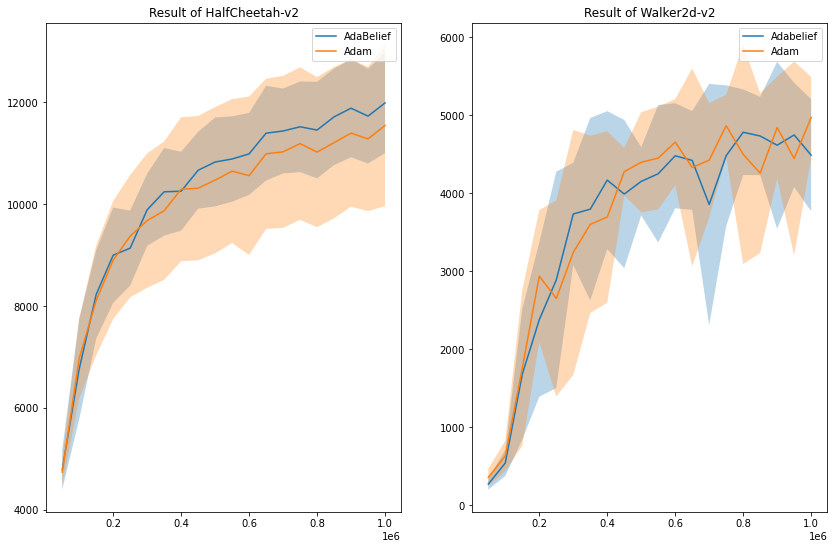

In [7]:
a = plot(process_data(data))